In [126]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


In [127]:
#Download data
working_dataframe=pd.read_csv('final_dataframe.csv')

In [128]:
working_dataframe.head()

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22


In [129]:
#Chhose features
model_data=working_dataframe.loc[:,['Number_of_Restaurants', 'Top_Restaurant_Category']]

In [130]:
model_data

,Number_of_Restaurants,Top_Restaurant_Category
0,5,Sandwich Restaurant
1,4,Restaurant
2,10,Seafood Restaurant
3,3,Mexican Restaurant
4,10,Seafood Restaurant
...,...,...
301,61,Thai Restaurant
302,33,Seafood Restaurant
303,0,Vietnamese Restaurant
304,31,Spanish Restaurant


In [131]:
#Encode categorical feature
import statsmodels.api as sm
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Top_Restaurant_Category'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

model_data_encoded = encoder.fit_transform(model_data)
model_data_encoded

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,Number_of_Restaurants,Top_Restaurant_Category_Sandwich Restaurant,Top_Restaurant_Category_Restaurant,Top_Restaurant_Category_Seafood Restaurant,Top_Restaurant_Category_Mexican Restaurant,Top_Restaurant_Category_Vegetarian / Vegan Restaurant,Top_Restaurant_Category_Steakhouse Restaurant,Top_Restaurant_Category_Pizza Restaurant,Top_Restaurant_Category_Spanish Restaurant,Top_Restaurant_Category_Latin American Restaurant,...,Top_Restaurant_Category_Tapas Restaurant,Top_Restaurant_Category_Szechuan Restaurant,Top_Restaurant_Category_Taiwanese Restaurant,Top_Restaurant_Category_Italian Restaurant,Top_Restaurant_Category_Sri Lankan Restaurant,Top_Restaurant_Category_Burger Restaurant,Top_Restaurant_Category_Coffee Restaurant,Top_Restaurant_Category_Japanese Restaurant,Top_Restaurant_Category_Peruvian Restaurant,Top_Restaurant_Category_Asian Restaurant
0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#Extract numerical feature
num_features = model_data_encoded.loc[:,['Number_of_Restaurants']]

In [133]:
num_features.columns.tolist()

['Number_of_Restaurants']

In [134]:
#Scale numerical feature
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
num_features_scaled=scaler.fit_transform(num_features)

In [135]:
selected_columns = num_features.columns

In [136]:
df_num_features_scaled = pd.DataFrame(num_features_scaled, columns = selected_columns)

In [137]:
df_num_features_scaled

,Number_of_Restaurants
0,-1.026110
1,-1.066641
2,-0.823458
3,-1.107171
4,-0.823458
...,...
301,1.243598
302,0.108744
303,-1.228763
304,0.027683


In [138]:
model_data_encoded['Number_of_Restaurants']=df_num_features_scaled['Number_of_Restaurants']

In [139]:
#Dataframe to implement clustering
model_data_encoded

,Number_of_Restaurants,Top_Restaurant_Category_Sandwich Restaurant,Top_Restaurant_Category_Restaurant,Top_Restaurant_Category_Seafood Restaurant,Top_Restaurant_Category_Mexican Restaurant,Top_Restaurant_Category_Vegetarian / Vegan Restaurant,Top_Restaurant_Category_Steakhouse Restaurant,Top_Restaurant_Category_Pizza Restaurant,Top_Restaurant_Category_Spanish Restaurant,Top_Restaurant_Category_Latin American Restaurant,...,Top_Restaurant_Category_Tapas Restaurant,Top_Restaurant_Category_Szechuan Restaurant,Top_Restaurant_Category_Taiwanese Restaurant,Top_Restaurant_Category_Italian Restaurant,Top_Restaurant_Category_Sri Lankan Restaurant,Top_Restaurant_Category_Burger Restaurant,Top_Restaurant_Category_Coffee Restaurant,Top_Restaurant_Category_Japanese Restaurant,Top_Restaurant_Category_Peruvian Restaurant,Top_Restaurant_Category_Asian Restaurant
0,-1.026110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.066641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.823458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.107171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.823458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.243598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.108744,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,-1.228763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,0.027683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
#Implement Elbow Rule to define the number of clusters
def plot_distortion(model_data_encoded,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(model_data_encoded)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



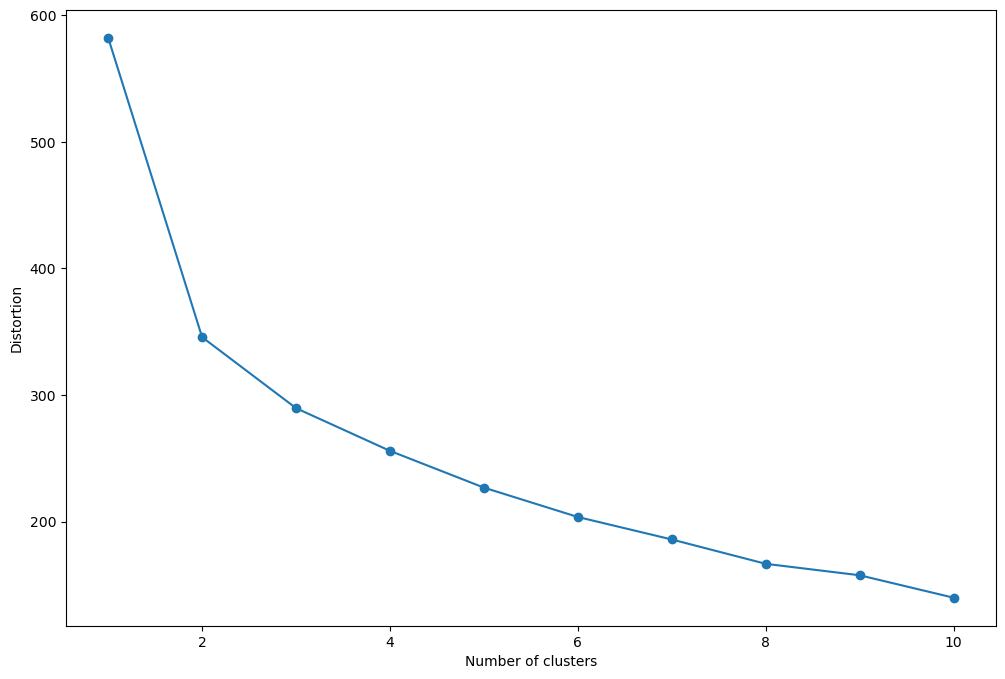

In [141]:
plot_distortion(model_data_encoded,max_clusters=10)

In [142]:
#Kmeans Clustering with defined number of Clusters
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [143]:
y_km = km.fit_predict(model_data_encoded)

In [144]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

0.3430056289971887

In [145]:
#Function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

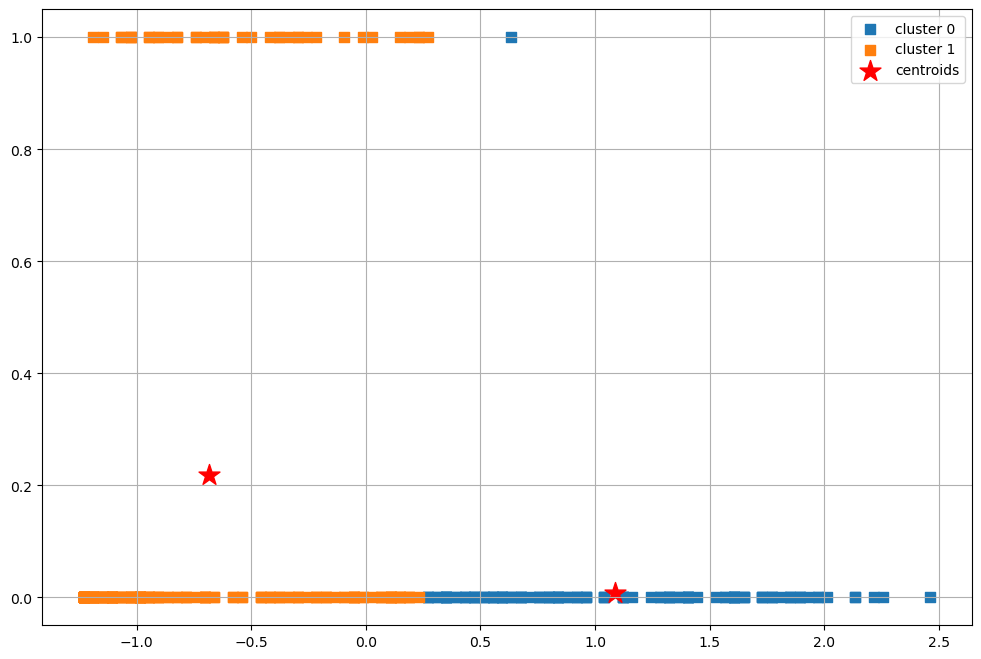

In [146]:
#Plot clusters with y_km 
plot_clusters(model_data_encoded.values, y_km, plt_cluster_centers= True)


In [147]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = model_data_encoded
pca = PCA(2)
 
#Transform the data DF is our model_encoded _data after PCA
df = pca.fit_transform(data)
 
df.shape

(306, 2)

In [148]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0]


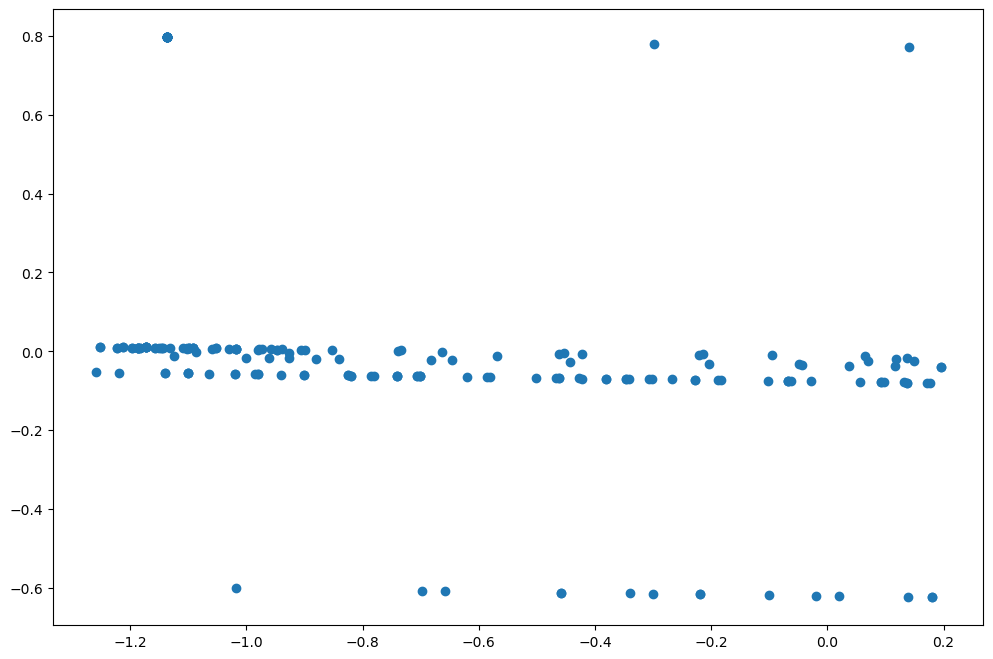

In [149]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

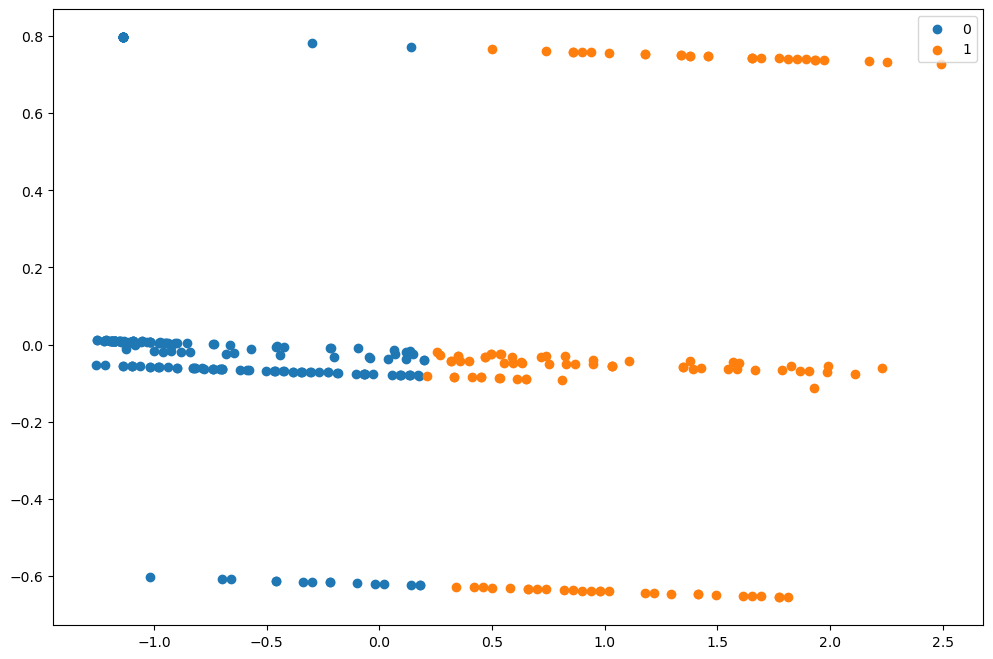

In [150]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

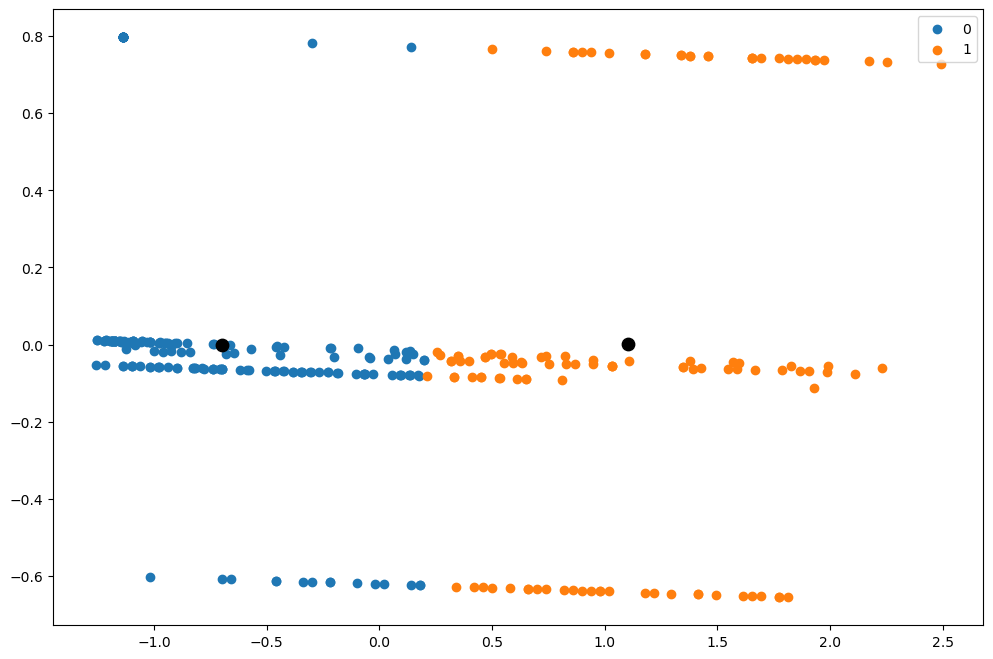

In [151]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [152]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

0.3430056289971887

In [153]:
#Let us visualize clusters
#PCA -set up
from sklearn.decomposition import PCA

X = model_data_encoded

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
#fig = px.scatter(components, x=0, y=1, color=y)
#fig.show()

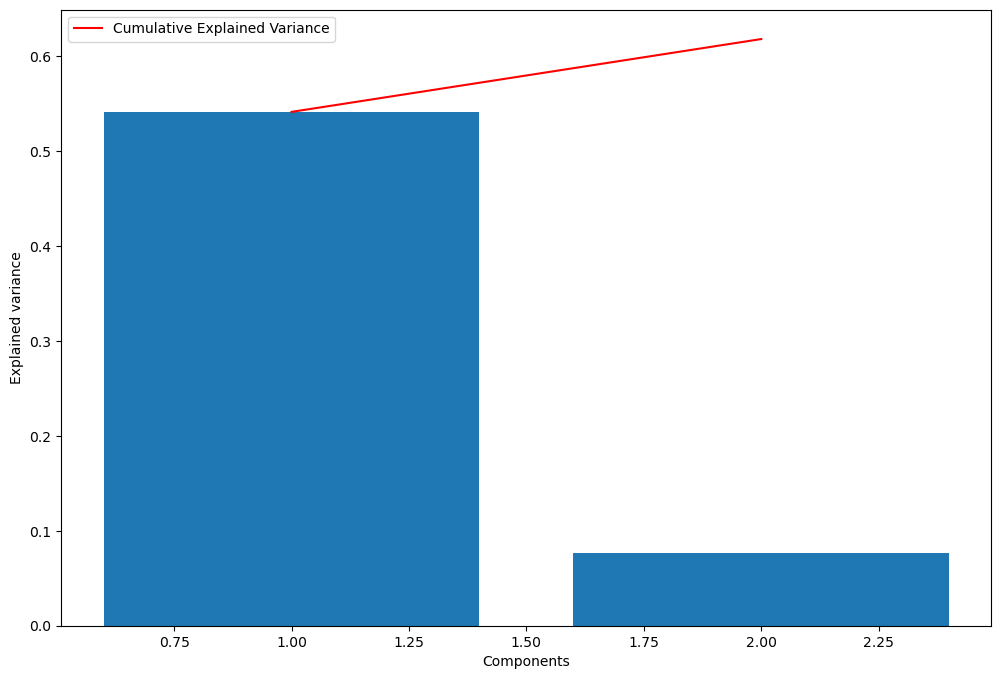

In [154]:
#PCA - define the number of components
plt.bar(range(1,len(pca_nbhoods.explained_variance_ratio_)+1),pca_nbhoods.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_nbhoods.explained_variance_ratio_ )+1),
         np.cumsum(pca_nbhoods.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

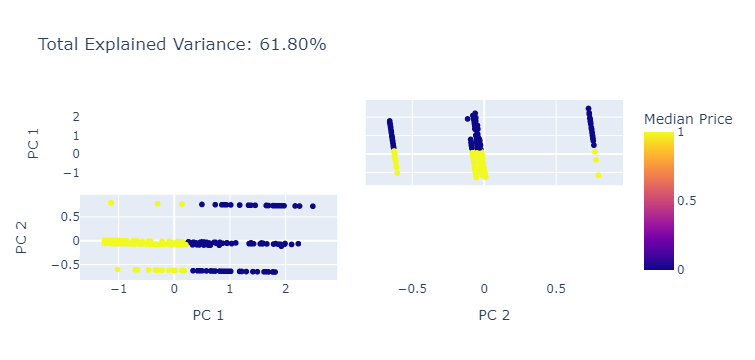

In [155]:
#Visualize PCA with 2 components
n_components = 2

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=y_km,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

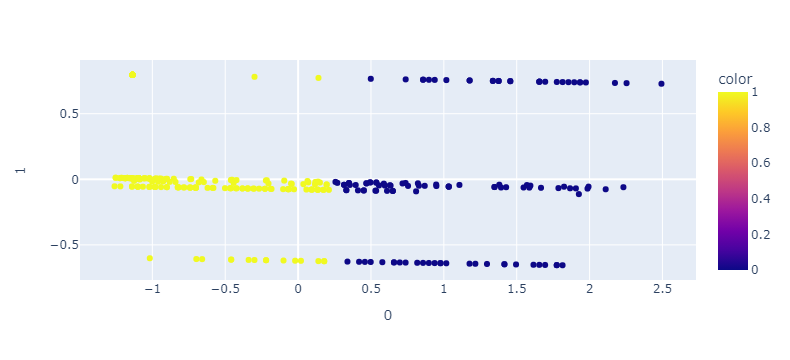

In [156]:
# 2D Scatter Plot
X = model_data_encoded

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

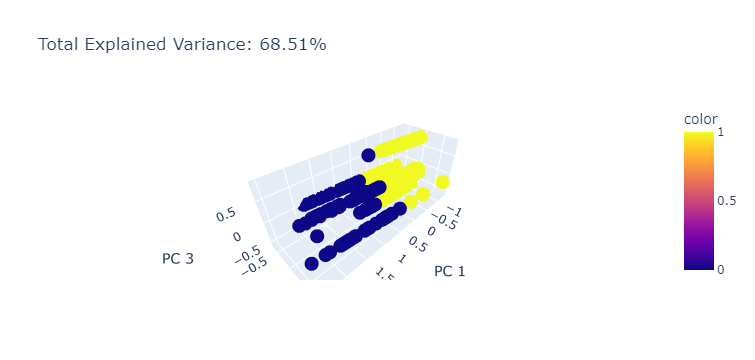

In [157]:
#3D Scatter Plot

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_km,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [158]:
#Hirachical clustering

In [159]:
#Explore the Dendrogram
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [160]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

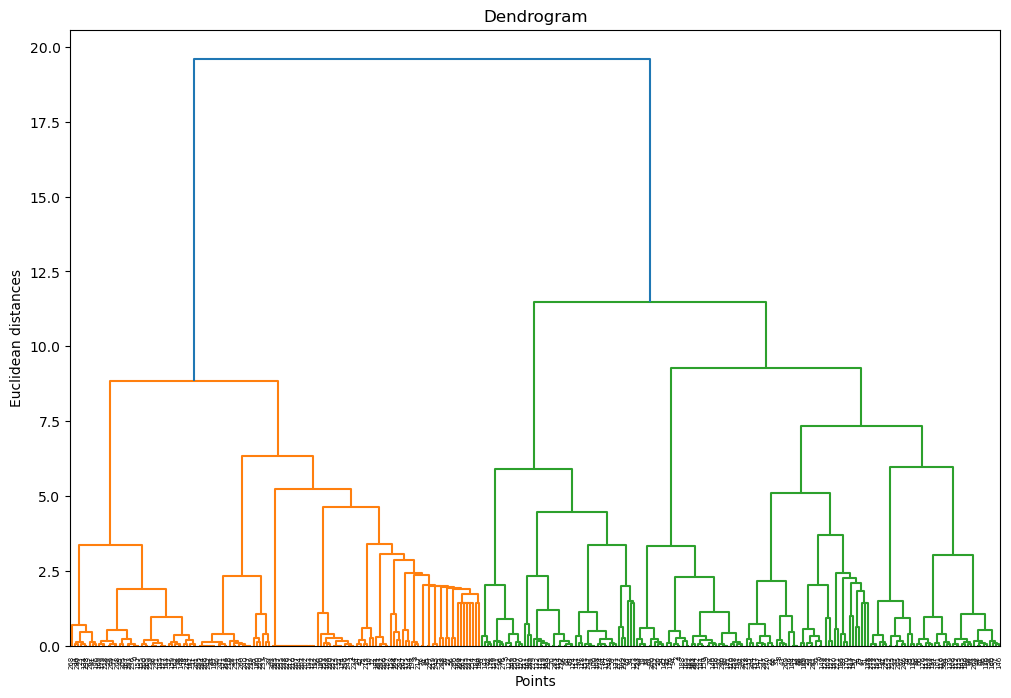

In [161]:
plot_dendrogram(model_data_encoded)

In [162]:
# create an object for Hier.Clust
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [163]:
y_hc = ac.fit_predict(model_data_encoded)
y_hc

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(model_data_encoded.values,y_hc)

In [164]:
metrics.silhouette_score(model_data_encoded, y_hc, metric='euclidean')

0.2805707515842388

In [165]:
#Initialize the class object
hierarch = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
 
#predict the labels of clusters.
label_hierarch = hierarch.fit_predict(df)
 
print(label_hierarch)

[1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 1 0 1]


In [166]:
metrics.silhouette_score(model_data_encoded, label_hierarch, metric='euclidean') #Same result with and without PCA


0.28361569212358034

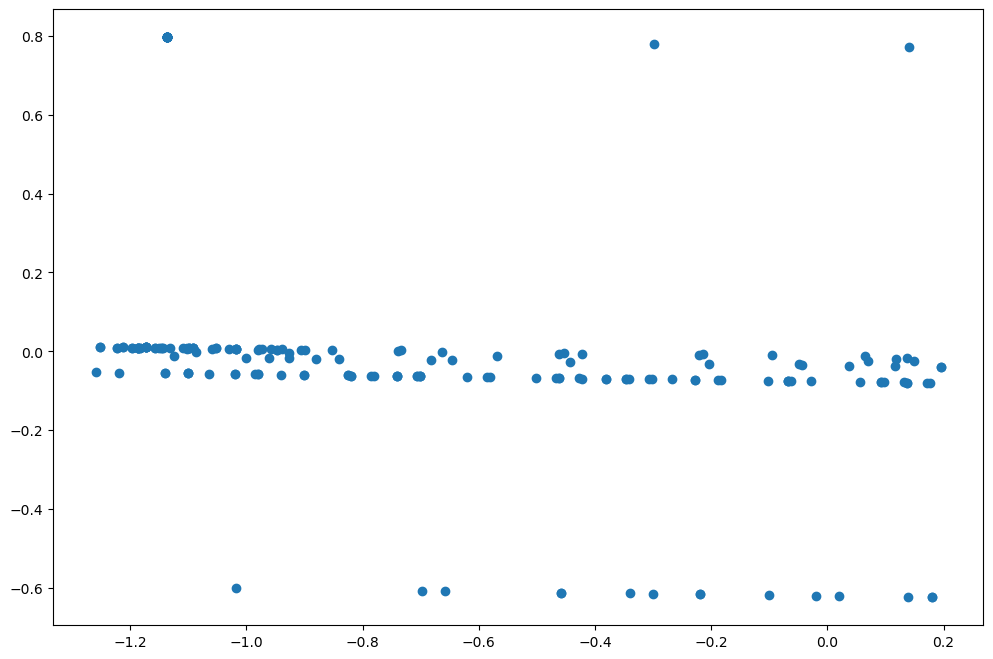

In [167]:
#filter rows of original data
filtered_label0_hierarch = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0_hierarch[:,0] , filtered_label0_hierarch[:,1])
plt.show()

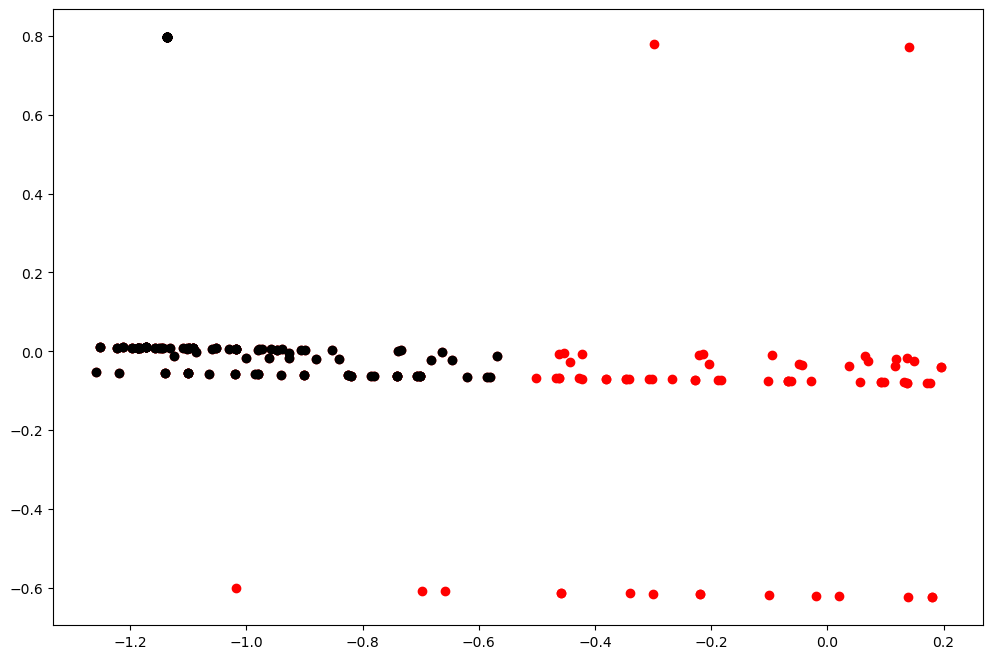

In [168]:
#filter rows of original data

 
filtered_label1_hierarch = df[label_hierarch == 1]
 
#Plotting the results
plt.scatter(filtered_label0_hierarch[:,0] , filtered_label0_hierarch[:,1] , color = 'red')
plt.scatter(filtered_label1_hierarch[:,0] , filtered_label1_hierarch[:,1] , color = 'black')
plt.show()

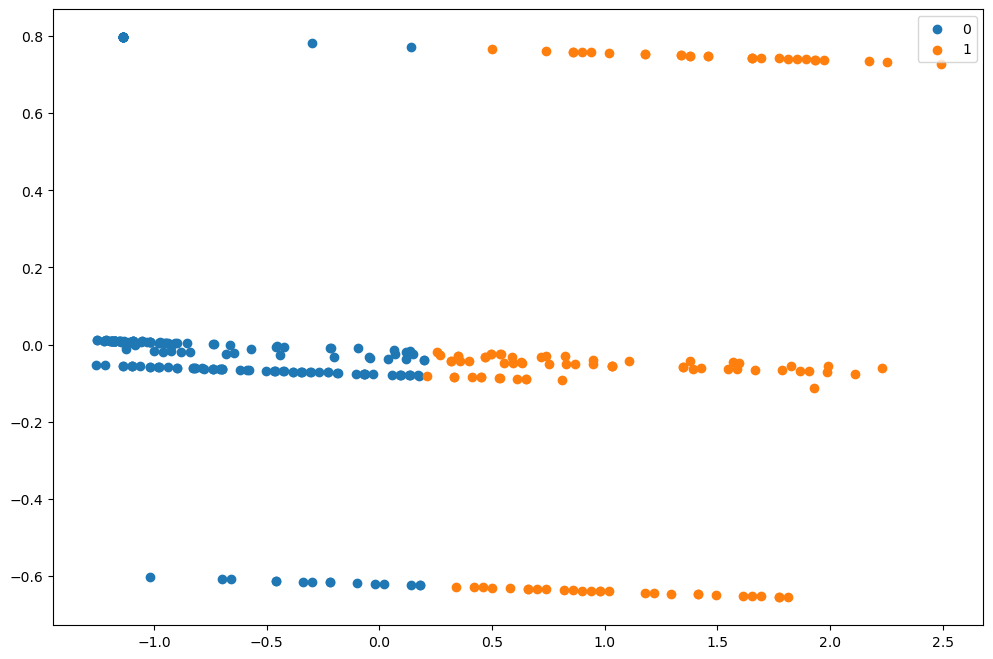

In [169]:
#Getting unique labels
 
u_labels = np.unique(label_hierarch)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [170]:
#DBScan

In [171]:
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [172]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [173]:
y_db = db.fit_predict(X)

In [174]:
X.shape

(306, 31)

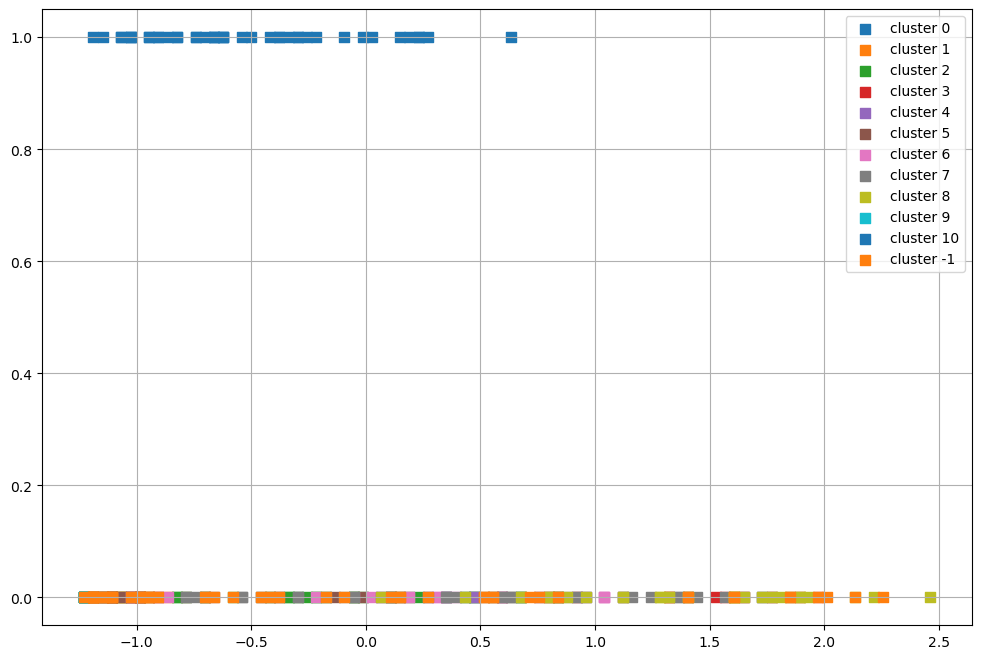

In [175]:
plot_clusters(X.values,y_db)

In [176]:
#Evaluation of DBScan - better than Kmeans. Take it to final clusters
labels = db.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

0.47233039986893344

In [177]:
set(db.labels_) #too many clusters and some of them are noise

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [178]:
#Get Clusters for each observation
cluster_map = pd.DataFrame()
cluster_map['data_index'] = model_data_encoded.index.values
cluster_map['cluster'] = km.labels_

cluster_map

,data_index,cluster
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
301,301,0
302,302,1
303,303,1
304,304,1


In [179]:
num_features['Cluster']=cluster_map['cluster']

In [180]:
working_dataframe['Cluster']=cluster_map['cluster']

In [181]:
#Save to file
working_dataframe.to_csv('NYC_clusters_Restaurants_2.csv', index=False)

In [182]:
#This is the DataFrame for discriptive cluster analysis
num_features

,Number_of_Restaurants,Cluster
0,5,1
1,4,1
2,10,1
3,3,1
4,10,1
...,...,...
301,61,0
302,33,1
303,0,1
304,31,1


In [1]:
#Save 12 clusters with DBScan as is has good score
cluster_map_db = pd.DataFrame()
cluster_map_db['data_index'] = model_data_encoded.index.values
cluster_map_db['cluster'] = db.labels_

cluster_map_db

NameError: name 'pd' is not defined

In [184]:
num_features['Cluster_db']=cluster_map_db['cluster']

In [185]:
working_dataframe['Cluster_db']=cluster_map_db['cluster']

In [186]:
working_dataframe

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster,Cluster_db
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0,1,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0,1,1
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0,1,2
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0,1,-1
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,61,Thai Restaurant,0,0,0,1,133,100,20,0,7
302,Queens,Hammels,40.587338,-73.805530,33,Seafood Restaurant,0,0,1,2,80,0,1615,1,2
303,Queens,Bayswater,40.611322,-73.765968,0,Vietnamese Restaurant,0,0,0,0,19,0,1,1,9
304,Queens,Queensbridge,40.756091,-73.945631,31,Spanish Restaurant,0,0,0,0,75,80,0,1,6


In [187]:
working_dataframe.to_csv('NYC_clusters_Restaurants_12.csv', index=False)

In [189]:
temp=pd.read_csv('NYC_clusters_Restaurants_12.csv')

In [192]:
#Get rid of -1 from DBSCAN
temp.loc[temp.Cluster_db==-1, 'Cluster_db']=11

In [193]:
temp.to_csv('NYC_clusters_Restaurants_12.csv', index=False)

In [108]:
df_cluster_0=num_features.loc[num_features.Cluster==0]

In [109]:
df_cluster_0.describe() 

,Number_of_Restaurants,Cluster
count,118.000000,118.0
mean,57.135593,0.0
std,13.958372,0.0
min,37.000000,0.0
25%,45.000000,0.0
50%,54.000000,0.0
75%,70.000000,0.0
max,91.000000,0.0


In [110]:
df_cluster_1=num_features.loc[num_features.Cluster==1]
df_cluster_1.describe()

,Number_of_Restaurants,Cluster
count,188.000000,188.0
mean,13.484043,1.0
std,11.641010,0.0
min,0.000000,1.0
25%,3.000000,1.0
50%,10.000000,1.0
75%,23.000000,1.0
max,37.000000,1.0
